# Regression

---

Regression is a statistical method used in different disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables). Regression analysis helps us to determine the line that most closely fits our data. In linear regression, we strive to find best linear line and our model is linear in **parameters** as well, hence the name. The target variable is continuous, meaning that it can take any value on a real line. Such as temperature outside, price of oil, or communal charges.


$$
$$

![alt text](images/reg.png "Title")


$$
$$


### Lecture outline

---

* Problem Statement


* Data Description


* EDA - Exploratory Data Analysis


* Data Processing


* Linear Regression


* Decision Tree Regression


* Random Forest Regression


* Model Performance Assessment

#### Reference


[Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)


[Ordinary Least Squares](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)


[sklearn - Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[sklearn - Decision Tree Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


[sklearn - Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [1]:
# For data processing
import pandas as pd
import numpy as np

# For data viz
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# For model performance assessment
from sklearn import metrics

In [2]:
plt.style.use("seaborn") # Set plotting style

## Problem Statement

---

To make their profit, insurance companies should collect higher premium than the amount paid to the insured person. Due to this, insurance companies invests a lot of time, effort, and money in creating models that accurately predicts health care costs and then correspondingly charge the insured person.


Today, we build one of the simplest model to make a prediction. However, this simplest model will give the best way to interpret the modeling results, compared to other "black-box" machine learning model results.

## Data Description

---

Generally, many factors that affect how much we pay for health insurance are not within our control: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost for the American people. We will predict individual medical costs billed by health insurance.

$$
$$


* **age**: Age of primary beneficiary


* **sex**: Insurance contractor gender, female or male


* **bmi**: Body Mass Index


* **children**: Number of children covered by health insurance / Number of dependents


* **smoker**: Smoking or not


* **region**: The beneficiary's residential area in the US

In [3]:
df = pd.read_csv("data/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
charges = b0 + b1*age + b2*sex + b3*bmi + e # linear-linear model


ln(charges) = b0 + b1*age + b2*sex + b3*bmi + e # log-linear model (e^b1 - 1)*100


ln(charges) = b0 + b1*ln(age) + b2*ln(sex) + b3*ln(bmi) + e # log-log model

## EDA - Exploratory Data Analysis

---

EDA helps us to have a better understanding of our data. In this step we try to extract as much information from our data as possible, such as to guess the data generation process and the distribution of the variables. By having this information we then be able to choose correct model and validate model assumptions. For example, if the data is not normally distributed then we cannot use models which assumed normal distribution in variables and hence we have to change our strategy.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.shape

(1338, 7)

### Checking Missing Values

---

We don't have missing values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate Analysis

---

In this stage, we examine variables one-by-one. The best way is to plot the histogram if the variable is continuous or count/frequency plot for categorical variable.

`age` seems to be uniformly distributed

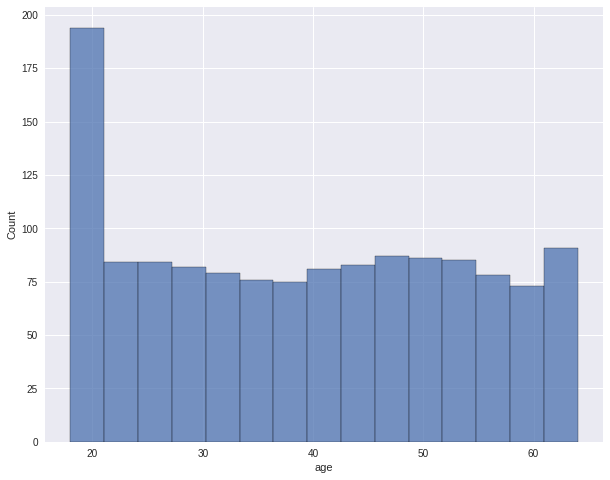

In [10]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15);

Histogram of `age` by `smoker` type

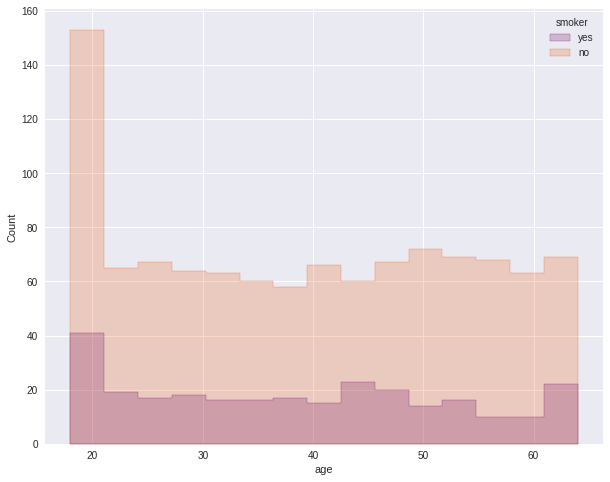

In [11]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15, hue="smoker", element="step", palette="inferno");

Histogram of `age` by `sex`

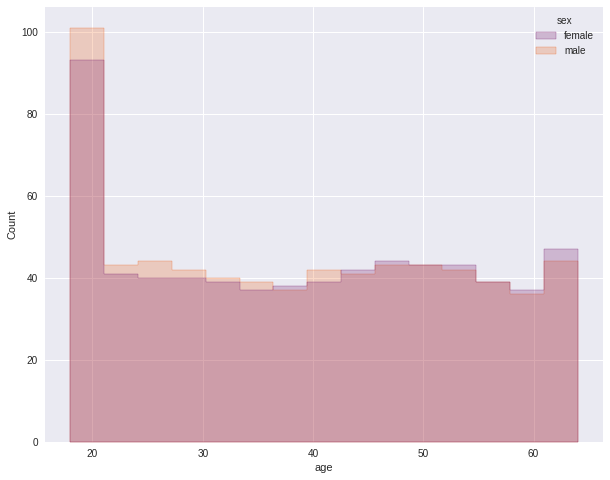

In [12]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="age", bins=15, hue="sex", element="step", palette="inferno");

`bmi` is normally distributed as expected!

Something strange happens here. The average a=of `bmi` is 30. With a value equal to 30 starts obesity. Are obese people tend to spend more in heath care?

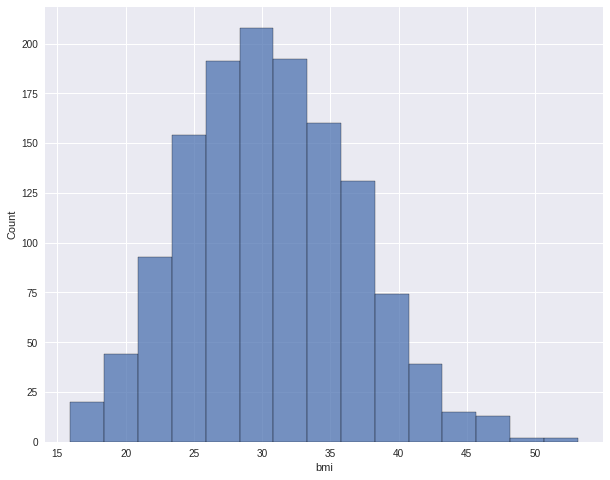

In [13]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15);

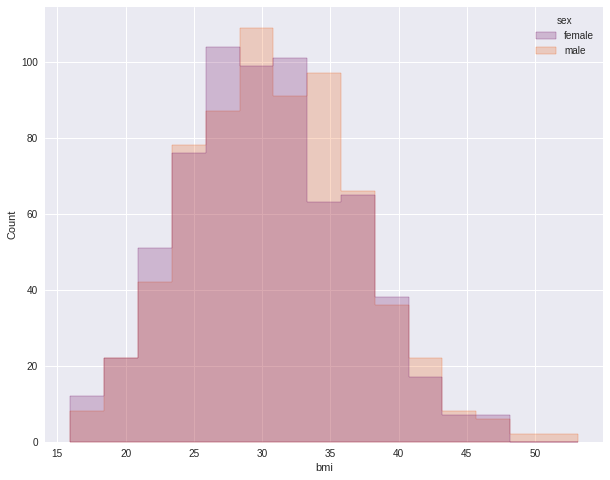

In [14]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15, hue="sex", element="step", palette="inferno");

This plot indicates that we have more non-smoker in the data then smokers

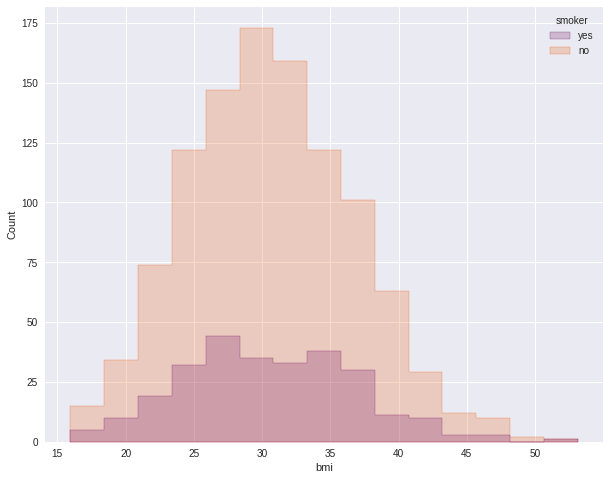

In [15]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="bmi", bins=15, hue="smoker", element="step", palette="inferno");

In [16]:
df["smoker"].value_counts() # This is the case

no     1064
yes     274
Name: smoker, dtype: int64

The distribution of male and female are the same

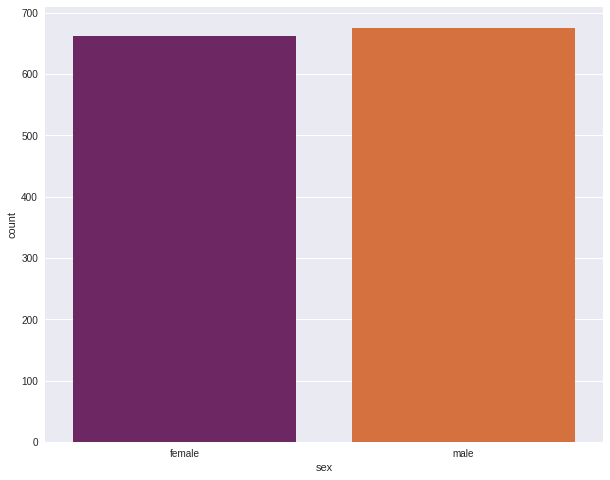

In [17]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="sex", palette="inferno");

The count plot of `sex` by `smoker`. Plot indicates that there are more male smokers.

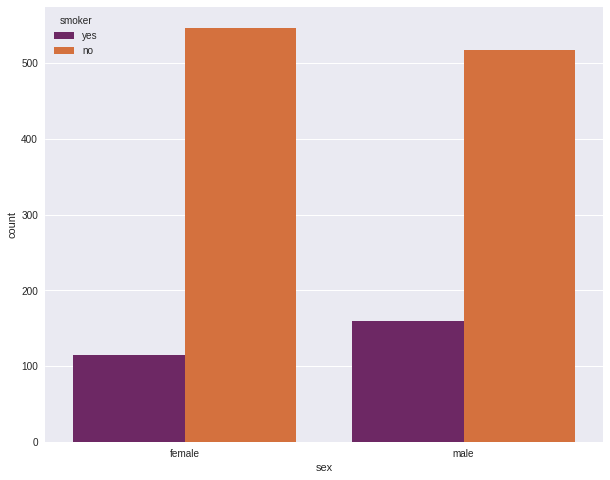

In [18]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="sex", hue="smoker", palette="inferno");

`smoker` by `region` indicates that in the southeast, there are relatively more smokers

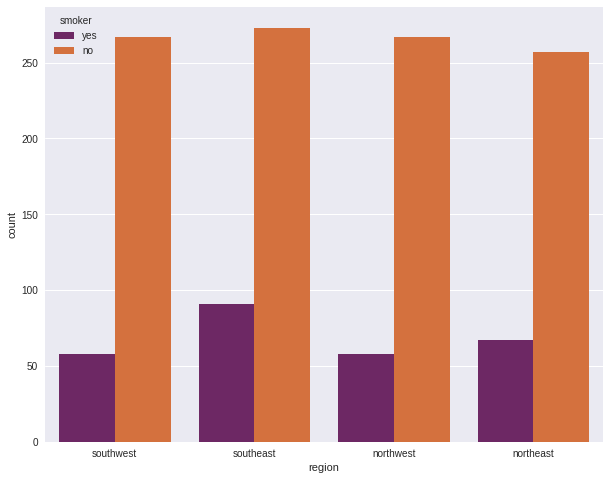

In [20]:
plt.figure(figsize=(10, 8))

sns.countplot(data=df, x="region", hue="smoker", palette="inferno");

Histogram of the target variable - `charges`. The distribution of the target variable is right skewed. Later on, we apply log transformation to make it look more normal.

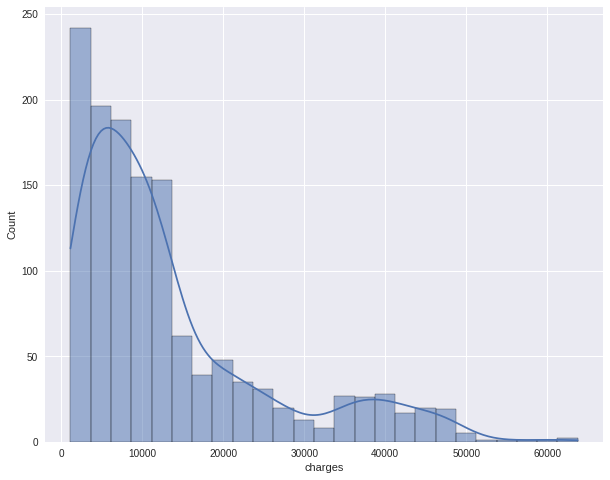

In [21]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True);

We can hypothesize that `charges` are more for `smokers` than `non-smokers`.

As we see, `charges` are higher for smokers, indeed.

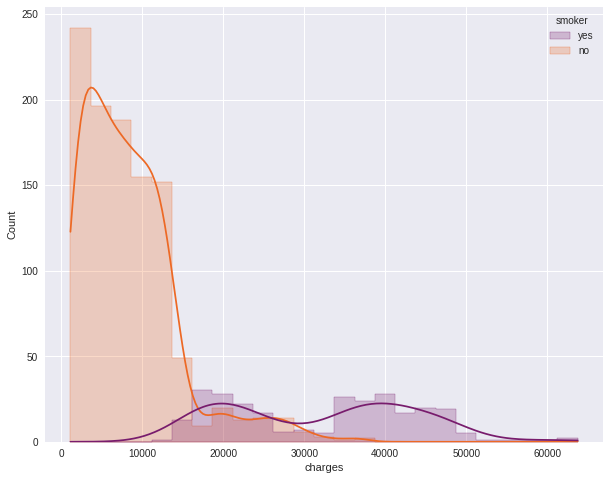

In [22]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True, hue="smoker", element="step", palette="inferno");

Histogram of `charges` by `sex` does not exhibit much difference

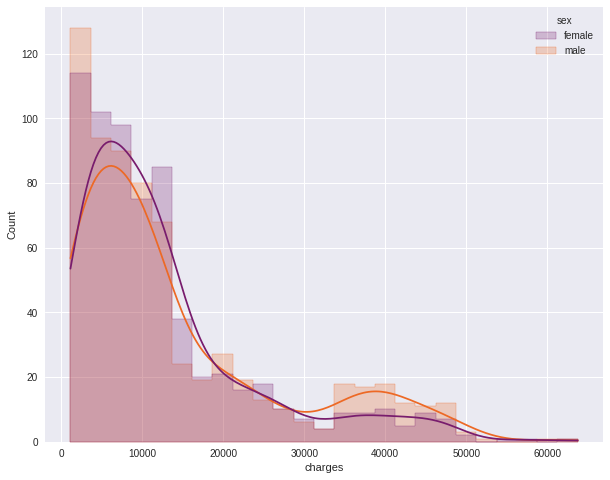

In [23]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x="charges", bins=25, kde=True, hue="sex", element="step", palette="inferno");

### Bivariate Analysis

---

In this stage, we analyze the pairs of variables, not single one.

The heatmap of the correlation shows that independent variables are not correlated to the target variable.

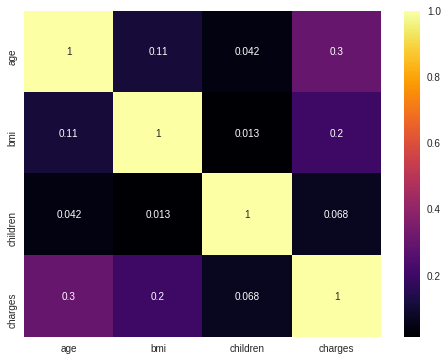

In [24]:
plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(), cmap = "inferno", annot=True);

If we look at the left plot the `charges` the plot is right skewed. In the right plot we will apply natural logarithm and then the plot approximately tends to be normal.

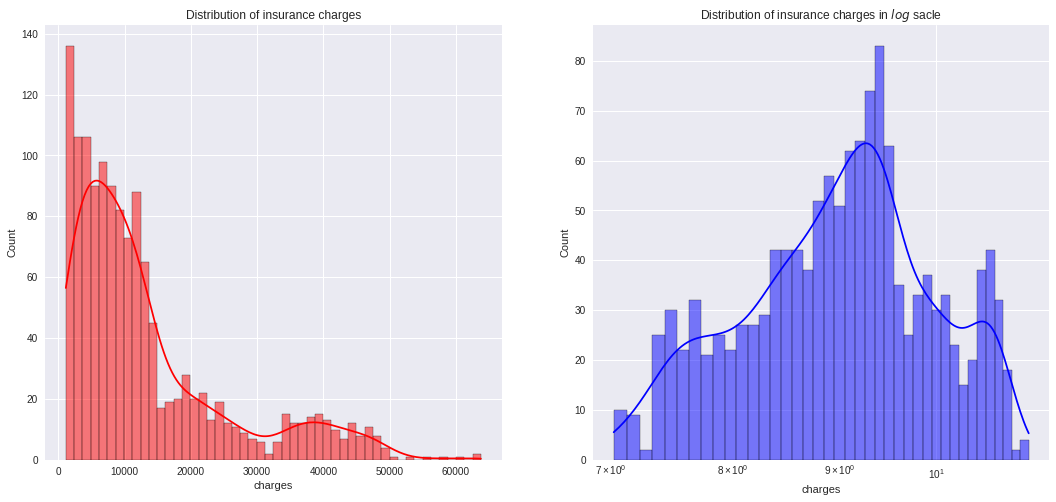

In [25]:
f= plt.figure(figsize=(18,8))

# For left plot
ax=f.add_subplot(121)

sns.histplot(df["charges"], bins=50, color="red", ax=ax, kde=True)
ax.set_title("Distribution of insurance charges")


# For right plot
ax=f.add_subplot(122)

sns.histplot(np.log(df["charges"]), bins=40, color="blue", ax=ax, kde=True)
ax.set_title("Distribution of insurance charges in $log$ sacle")
ax.set_xscale("log");

Now let's look at the charges by `region`

In [26]:
charges_by_region = df["charges"].groupby(df["region"]).sum().sort_values(ascending = True)


charges_by_region

region
southwest    4.012755e+06
northwest    4.035712e+06
northeast    4.343669e+06
southeast    5.363690e+06
Name: charges, dtype: float64

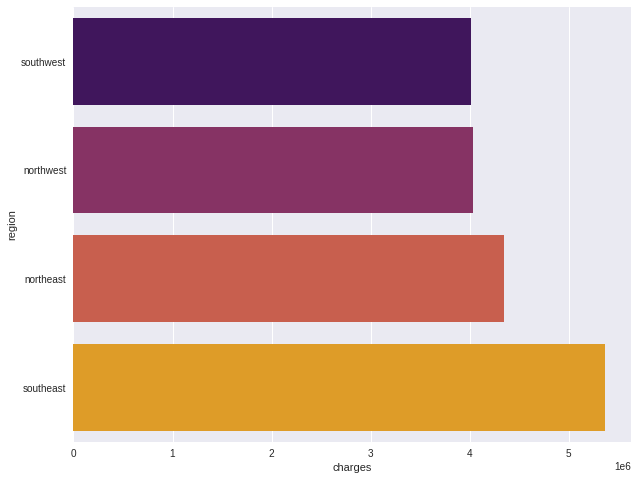

In [27]:
plt.figure(figsize=(10, 8))


sns.barplot(x=charges_by_region, y=charges_by_region.index, palette="inferno");

So, overall the highest medical charges are in the `Southeast` and the lowest are in the `Southwest`. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region.

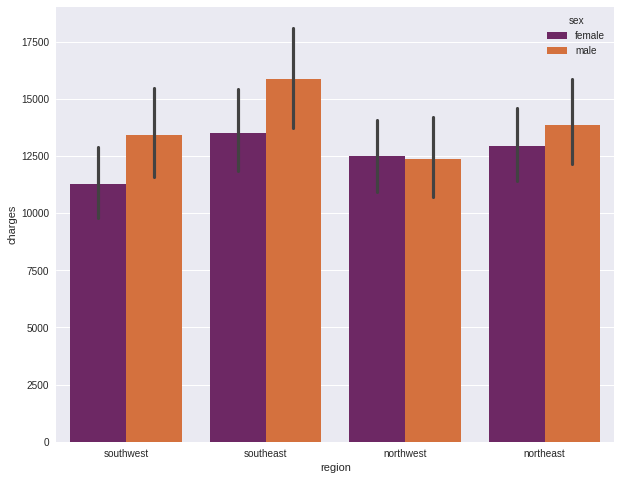

In [28]:
plt.figure(figsize=(10, 8))

sns.barplot(data=df, x="region", y="charges", hue="sex", palette="inferno");

People who have children, generally smoke less, which the following violinplots shows too.

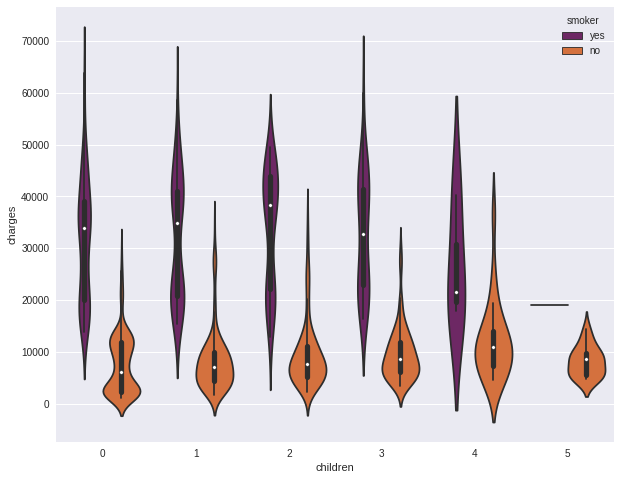

In [29]:
plt.figure(figsize=(10, 8))

sns.violinplot(data=df, x="children", y="charges", orient="v", hue="smoker", palette="inferno");

Let now see, how having more children determines the medical charges

In [30]:
df.groupby("children").agg([np.min, np.max, np.mean])["charges"].round(2)

,amin,amax,mean
children,,,
0,1121.87,63770.43,12365.98
1,1711.03,58571.07,12731.17
2,2304.00,49577.66,15073.56
3,3443.06,60021.40,15355.32
4,4504.66,40182.25,13850.66
5,4687.80,19023.26,8786.04


In the correlation matrix we saw that `charges` column has the highest correlation with `age` and `bmi`. Let see the relationship among these variables.

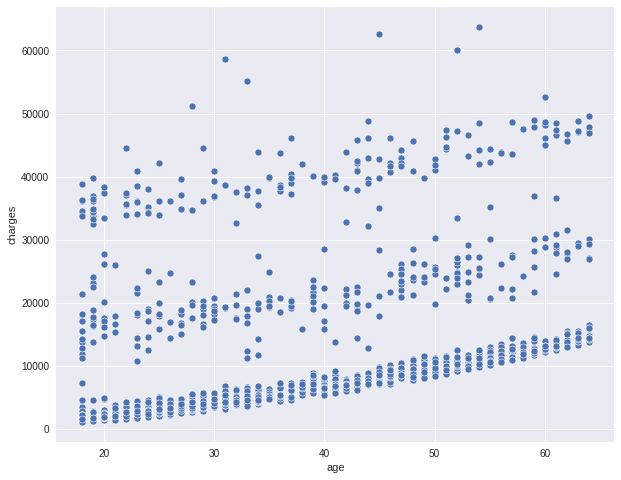

In [31]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x="age", y="charges", palette="inferno");

Scatter plot of `charges` and `age` by `smoker`

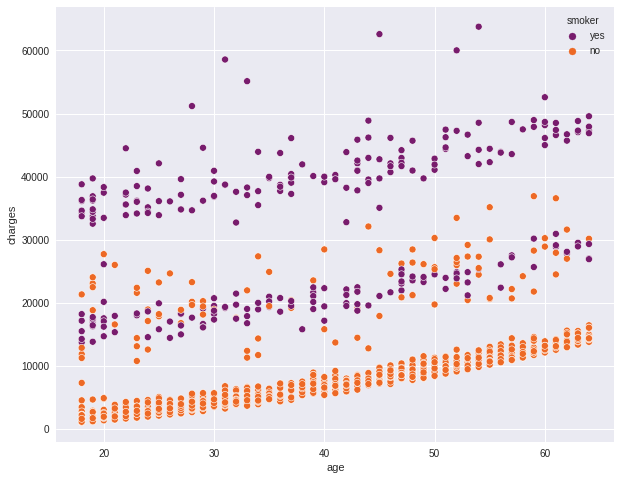

In [32]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x="age", y="charges", hue="smoker", palette="inferno");

Scatter plot of `charges` and `bmi`

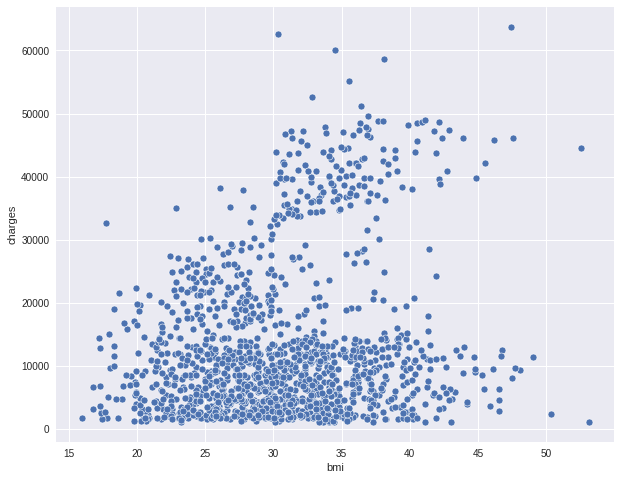

In [33]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x="bmi", y="charges", palette="inferno");

Scatter plot of `charges` and `bmi` by `sex`

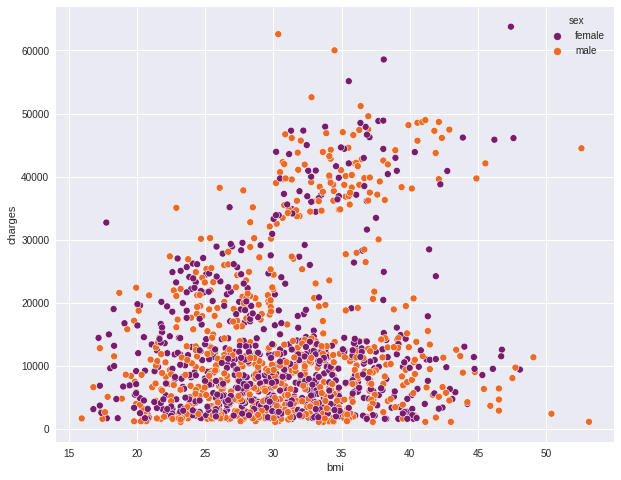

In [34]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x="bmi", y="charges", hue="sex", palette="inferno");

### Visualizing regression models

---

The regression plots in `seaborn` are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. `seaborn` is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, we should use `statsmodels` and we'll do so. Up until that, exploring a dataset through visualization is just as important as exploring a dataset through tables of statistics.

Before we start modeling part, it's quite interesting to use `seaborn`'s plotting capability to see the best fitted line to only two variables: `age` and `bmi`.

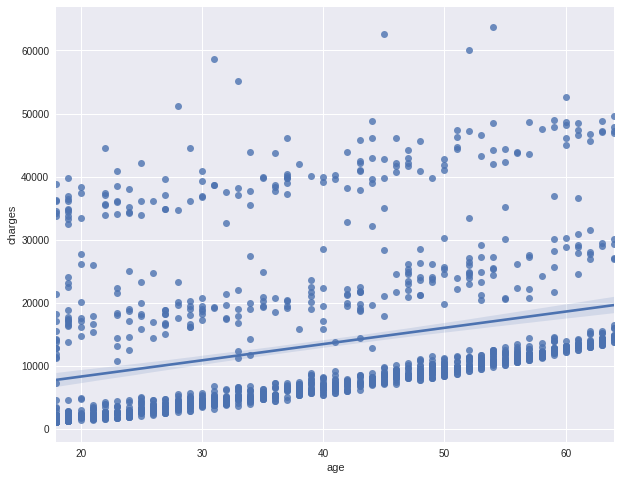

In [35]:
plt.figure(figsize=(10, 8))

sns.regplot(data=df, x="age", y="charges");

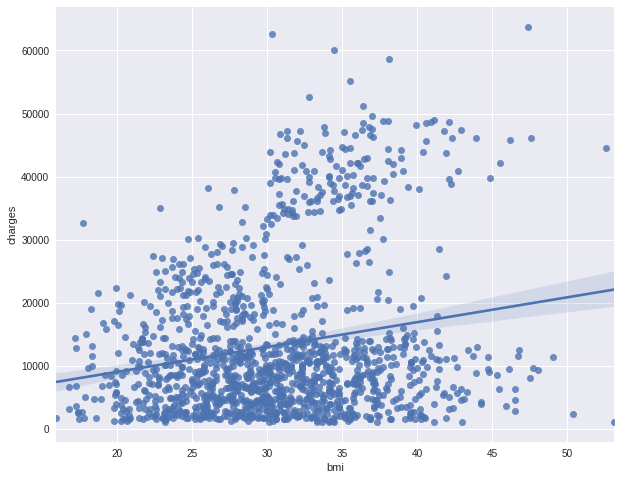

In [36]:
plt.figure(figsize=(10, 8))

sns.regplot(data=df, x="bmi", y="charges");

## Data Processing

---

In this step, we are processing data in a way to fit the model. Invalid or ill-processed data causes to degrade model performance and hence give biased results.

### Variable Transformation


Machine learning algorithms cannot work with categorical data directly and hence categorical data must be converted to numerical one. Here, I will use two different types of transformation:


* Label Encoding


* One Hot Encoding


$$
$$


**Label Encoding** refers to transforming the alphanumeric labels into numerical form so that the algorithms can understand how to operate on them.


**One hot Encoding** is a representation of categorical variable as binary vectors. In other words, it's a dummy variable or indicator variable.


Note that, when dialing with dummy variables we should not fall in dummy variable trap. The dummy variable trap is a scenario in which the independent variables are multicollinear — a scenario in which two or more variables are highly correlated. In simple terms one variable can be predicted from the others.


Pandas `get_dummies()` method does both label encoding and one hot encoding. However `sklearn` library can do that too.

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
categorical_columns = ["sex", "children", "smoker", "region"]

In [40]:
df = pd.get_dummies(data=df, columns=categorical_columns, drop_first=True)

In [41]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


During the EDA, we saw that out dependent variable `charges` is not normally distributed. Taking log transformation makes it to look more normal. Hence, it's better to convert it into logarithmic scale.

In [42]:
df["charges"] = np.log(df["charges"])

In [43]:
df.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


### Train-Test Split

---

We need to split our data into two parts: train set and test set. On the train set we train the model and on the test set we check the model performance.

In [44]:
X = df.drop(["charges"], axis = 1)

y = df["charges"]

In [45]:
X

,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,28,33.000,1,0,0,1,0,0,0,0,1,0
3,33,22.705,1,0,0,0,0,0,0,1,0,0
4,32,28.880,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,0,0,0,0,1


We have to add a constant term to our `X` dataset. This is a regression constant, sometimes called intercept.

In [46]:
X.insert(0, "constant", 1)

In [47]:
X.head()

,constant,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,19,27.900,0,0,0,0,0,0,1,0,0,1
1,1,18,33.770,1,1,0,0,0,0,0,0,1,0
2,1,28,33.000,1,0,0,1,0,0,0,0,1,0
3,1,33,22.705,1,0,0,0,0,0,0,1,0,0
4,1,32,28.880,1,0,0,0,0,0,0,1,0,0


Now, we are ready to perform split. 80% of data will go for training and 20% for testing

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=425, shuffle=True)

In [49]:
print("X train size: \t", x_train.shape)
print("Y train size: \t", y_train.shape)

print("X test size: \t", x_test.shape)
print("Y test size: \t", y_test.shape)

X train size: 	 (1070, 13)
Y train size: 	 (1070,)
X test size: 	 (268, 13)
Y test size: 	 (268,)


## Linear Regression

---

Linear regression is a supervised learning algorithm used when target / dependent variable is continues real number. It establishes relationship between dependent variable  y  and one or more independent variable  x  using best fit line. In statistics OLS is method to estimate unknown parameter of linear function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression function.

$$
$$

![alt text](images/lin_reg.jpg "Title")

In [89]:
x_train

,constant,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
1175,1,22,27.100,0,0,0,0,0,0,0,0,0,1
735,1,49,34.770,0,1,0,0,0,0,0,1,0,0
143,1,29,29.735,1,0,1,0,0,0,0,1,0,0
1160,1,43,34.580,0,1,0,0,0,0,0,1,0,0
685,1,53,26.410,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,1,50,32.300,1,1,0,0,0,0,1,0,0,0
96,1,54,30.800,0,0,0,1,0,0,0,0,0,1
1106,1,49,29.925,0,0,0,0,0,0,0,1,0,0
1165,1,35,26.125,0,0,0,0,0,0,0,0,0,0


### Sklearn

In [50]:
regression_model_1 = LinearRegression() # Create model object

In [51]:
regression_model_1

LinearRegression()

In [52]:
regression_model_1.fit(x_train, y_train) # Fit model to the data - actual model training

LinearRegression()

In [53]:
print("Model Intercept: ", regression_model_1.intercept_)
print()
print("Model Coefficients: ", regression_model_1.coef_)

Model Intercept:  7.060200815413739

Model Coefficients:  [ 0.          0.03366481  0.013285   -0.06935366  0.12978512  0.28650475
  0.23808365  0.51433737  0.37069587  1.54193475 -0.06620806 -0.14883408
 -0.13121137]


In [63]:
np.exp(0.03366481 - 1) * 100 # როცა bmi იზრდება ერთი ერთეულით, მაშინ ყოველთვიური გადასახადი იზრდება 38%

38.0474854225321

In [59]:
x_train.head()

,constant,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
1175,1,22,27.100,0,0,0,0,0,0,0,0,0,1
735,1,49,34.770,0,1,0,0,0,0,0,1,0,0
143,1,29,29.735,1,0,1,0,0,0,0,1,0,0
1160,1,43,34.580,0,1,0,0,0,0,0,1,0,0
685,1,53,26.410,1,0,1,0,0,0,0,0,0,0


In [64]:
prediction_ols = regression_model_1.predict(x_test) # Make prediction on the test set

In [67]:
print("R Squared: ", metrics.r2_score(y_true=y_test, y_pred=prediction_ols).round(3)) # Calculate goodness of fit

R Squared:  0.816


### Statsmodels

In [68]:
linear_model = sm.OLS(endog=y_train, exog=x_train, hasconst=True) # Create the model object

In [69]:
result = linear_model.fit() # Fit the model

In [70]:
result.summary() # Print model results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     273.0
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.30e-313
Time:                        21:01:19   Log-Likelihood:                -652.52
No. Observations:                1070   AIC:                             1331.
Df Residuals:                    1057   BIC:                             1396.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
constant             7.0602      0.083     84.907      0.000       6.897       7.223
age                  0.0337      0.001     33.933      0.000       0.032       0.036
bmi                  0.0133      0.002      5.608      0.000       0.009       0.018
sex_male            -0.0694      0.028     -2.520      0.012      -0.123      -0.015
children_1           0.1298      0.035      3.723      0.000       0.061       0.198
children_2           0.2865      0.038      7.459      0.000       0.211       0.362
children_3           0.2381      0.046      5.171      0.000       0.148       0.328
children_4           0.5143      0.105      4.891      0.000       0.308       0.721
children_5           0.3707      0.118      3.142      0.002       0.139       0.602
smoker_yes           1.5419      0.035     44.324      0.000       1.474       1.610
region_northwest    -0.0662      0.039     -1.699      0.090      -0.143       0.010
region_southeast    -0.1488      0.040     -3.767      0.000      -0.226      -0.071
region_southwest    -0.1312      0.039     -3.367      0.001      -0.208      -0.055
==============================================================================
Omnibus:                      383.249   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.549
Skew:                           1.733   Prob(JB):                    9.88e-296
Kurtosis:                       7.296   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
prediction = result.predict(x_test) # Make a prediction

### Interpretation of the results

---

When the dependent variable is log-transformed we have to exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable.

For example: the coefficient for `bmi` is 0.0133. (exp(0.0133) – 1) * 100 = 1.33 For every one-unit increase in the independent variable, our dependent variable increases by about 1.33%


The interpretation of the constant term is that it is an average value. In other words, when all other independent variables are set to zero, the we expect that the `charge` should be (exp(7.0602) - 1) or $1163

## Decision Tree Regression

---

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

#### Reference


[Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree)

In [72]:
x_train

,constant,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
1175,1,22,27.100,0,0,0,0,0,0,0,0,0,1
735,1,49,34.770,0,1,0,0,0,0,0,1,0,0
143,1,29,29.735,1,0,1,0,0,0,0,1,0,0
1160,1,43,34.580,0,1,0,0,0,0,0,1,0,0
685,1,53,26.410,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,1,50,32.300,1,1,0,0,0,0,1,0,0,0
96,1,54,30.800,0,0,0,1,0,0,0,0,0,1
1106,1,49,29.925,0,0,0,0,0,0,0,1,0,0
1165,1,35,26.125,0,0,0,0,0,0,0,0,0,0


In [73]:
tree_regressor = DecisionTreeRegressor(random_state=425) # Create model object

In [74]:
tree_regressor.fit(x_train, y_train) # Fit the model

DecisionTreeRegressor(random_state=425)

In [75]:
prediction_tree = tree_regressor.predict(x_test)

In [76]:
print("R Squared: ", metrics.r2_score(y_true=y_test, y_pred=prediction_tree).round(3)) # Calculate goodness of fit

R Squared:  0.744


### Feature Importances

---

Decision tree can calculate the feature importance. In other words, feature importance means the share of the contribution to explain dependent variable by independent variables.

In [77]:
features = x_test.columns.to_list()

importances = tree_regressor.feature_importances_

indices = np.argsort(importances)

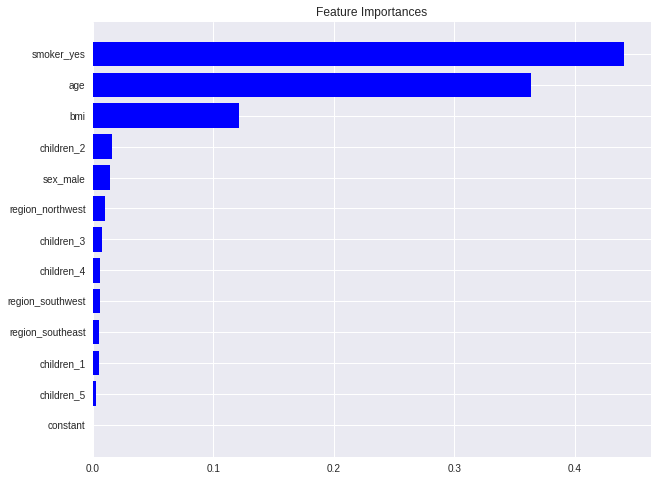

In [78]:
plt.figure(figsize=(10, 8))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="blue", align="center")

plt.yticks(range(len(indices)), [features[i] for i in indices]);

## Random Forest Regression

---

Random Forest represents the ensemble learning algorithm. The goal of ensemble algorithms is to combine the predictions of several weak estimators, such as decision tree in order to improve model performance. Particularly, random forest as name suggests is the forest of the decision trees.

In [79]:
forest_regressor = RandomForestRegressor(n_estimators=150, max_depth=2, random_state=425) # Create model object

In [80]:
forest_regressor.fit(x_train, y_train) # Fit the model

RandomForestRegressor(max_depth=2, n_estimators=150, random_state=425)

In [81]:
prediction_forest = forest_regressor.predict(x_test)

In [82]:
print("R Squared: ", metrics.r2_score(y_true=y_test, y_pred=prediction_forest).round(3)) # Calculate goodness of fit

R Squared:  0.776


### Feature Importance

In [83]:
features = x_test.columns.to_list()

importances = forest_regressor.feature_importances_

indices = np.argsort(importances)

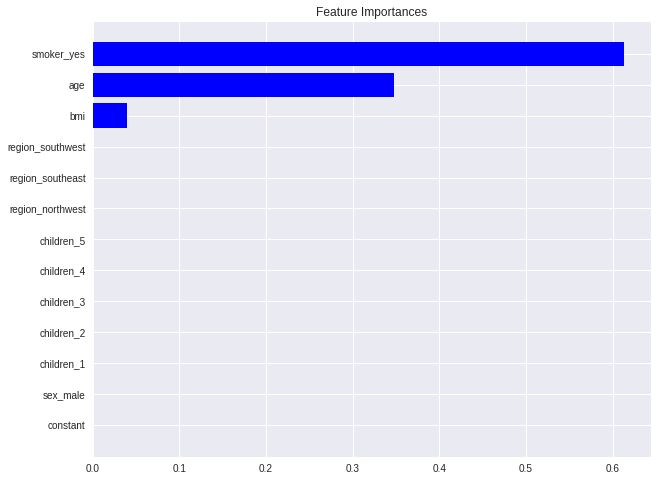

In [84]:
plt.figure(figsize=(10, 8))

plt.title("Feature Importances")

plt.barh(range(len(indices)), importances[indices], color="blue", align="center")

plt.yticks(range(len(indices)), [features[i] for i in indices]);

## Model Performance Assessment

---

There are 3 main metrics for model evaluation in regression:

1. R Square and Adjusted R Square


2. Mean Square Error(MSE) and Root Mean Square Error(RMSE)


3. Mean Absolute Error(MAE)

### R Squared and Adjusted R Squared

---

Adjusted R Squared penalizes R Squared not to be monotonically increasing.

![alt text](images/r2.png "Title")

![alt text](images/adjr2.png "Title")

$$
$$

#### Where, $N$ is the number of samples (observations) and $p$ is the number of predictors (independent variables)

In [85]:
print("R Squared - OLS: ", metrics.r2_score(y_true=y_test, y_pred=prediction_ols).round(3))

print("R Squared - Tree: ", metrics.r2_score(y_true=y_test, y_pred=prediction_tree).round(3))

print("R Squared - Forest: ", metrics.r2_score(y_true=y_test, y_pred=prediction_forest).round(3))

R Squared - OLS:  0.816
R Squared - Tree:  0.744
R Squared - Forest:  0.776


### Mean Square Error(MSE) and Root Mean Square Error(RMSE)

---

`MSE` measures the average of the squares of the errors. That is, the average squared difference between the estimated values and the actual values.

![alt text](images/mse.png "Title")

![alt text](images/rmse.png "Title")

In [86]:
print("MSE - OLS: ", metrics.mean_squared_error(y_true=y_test, y_pred=prediction_ols).round(3))

print("MSE - Tree: ", metrics.mean_squared_error(y_true=y_test, y_pred=prediction_tree).round(3))

print("MSE - Forest: ", metrics.mean_squared_error(y_true=y_test, y_pred=prediction_forest).round(3))

MSE - OLS:  0.18
MSE - Tree:  0.249
MSE - Forest:  0.218


### Mean Absolute Error(MAE)

---

It's an arithmetic average of absolute error in our measurement

![alt text](images/mae1.png "Title")

In [87]:
print("MAE - OLS: ", metrics.mean_absolute_error(y_true=y_test, y_pred=prediction_ols).round(3))

print("MAE - Tree: ", metrics.mean_absolute_error(y_true=y_test, y_pred=prediction_tree).round(3))

print("MAE - Forest: ", metrics.mean_absolute_error(y_true=y_test, y_pred=prediction_forest).round(3))

MAE - OLS:  0.285
MAE - Tree:  0.254
MAE - Forest:  0.338


In [88]:
x_train

,constant,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
1175,1,22,27.100,0,0,0,0,0,0,0,0,0,1
735,1,49,34.770,0,1,0,0,0,0,0,1,0,0
143,1,29,29.735,1,0,1,0,0,0,0,1,0,0
1160,1,43,34.580,0,1,0,0,0,0,0,1,0,0
685,1,53,26.410,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,1,50,32.300,1,1,0,0,0,0,1,0,0,0
96,1,54,30.800,0,0,0,1,0,0,0,0,0,1
1106,1,49,29.925,0,0,0,0,0,0,0,1,0,0
1165,1,35,26.125,0,0,0,0,0,0,0,0,0,0


# Summary

---

In this lecture, we've covered the most exciting part of a data science. In this stage, we try to predict the future or to find out the relation between dependent and independent variables. However, the models we saw today, are rather simple, yet the most interpretable models out there in ML world.


Always remember, we have a trade off. On the one hand we have a complex model which predicts the future more accurately but fails to be interpretable and on the second hand we have simple models, which are less accurate but is we can interpret their result easily.


**Make wise decision. Complex models are not always necessary!!!**